In [1]:
import pandas as pd
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
from collections import Counter
import itertools
import string
from pythainlp.corpus import thai_stopwords
from pythainlp import word_tokenize


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tokyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tokyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv ('data_tag/datatestv2.csv')

In [5]:
df.head()

,Job_Title,Company,Location,Job_Position,Job_Type,Salary Min,Salary Max,Job_Description,Tag
0,GL Account Assistant Manager,"MEGA CLINIC Co., Ltd.","Sathon, Bangkok",Financial Accounting & Reporting,Full time,36000.0,53000.0,About us ร่วมเป็นส่วนหนึ่งกับทีม MEGA CLINIC\n...,Accounting
1,Tax Associate,PKF Holdings (Thailand) Limited,"Sathon, Bangkok",Taxation,Full time,NaN,NaN,Position Summary This position is for a lawyer...,Accounting
2,Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...,Sodexo Services (Thailand) Ltd.,Bangkok,Accounts Receivable/Credit Control,Full time,NaN,NaN,Reports To: FINANCE MANAGER Key Result Areas: ...,Accounting
3,Assistant Accounting Manager,Mazars Holding (Thailand) Ltd.,"Sathon, Bangkok",Business Services & Corporate Advisory,Full time,NaN,NaN,Job Description Prepare management reports for...,Accounting
4,Assistant Tax Manager - M&A and tax advisory,Mazars Holding (Thailand) Ltd.,"Sathon, Bangkok",Taxation,Full time,NaN,NaN,Job Description: The ideal candidate will be a...,Accounting


In [6]:
job_counts = df.groupby('Location')['Job_Position'].count().sort_values(ascending=False)

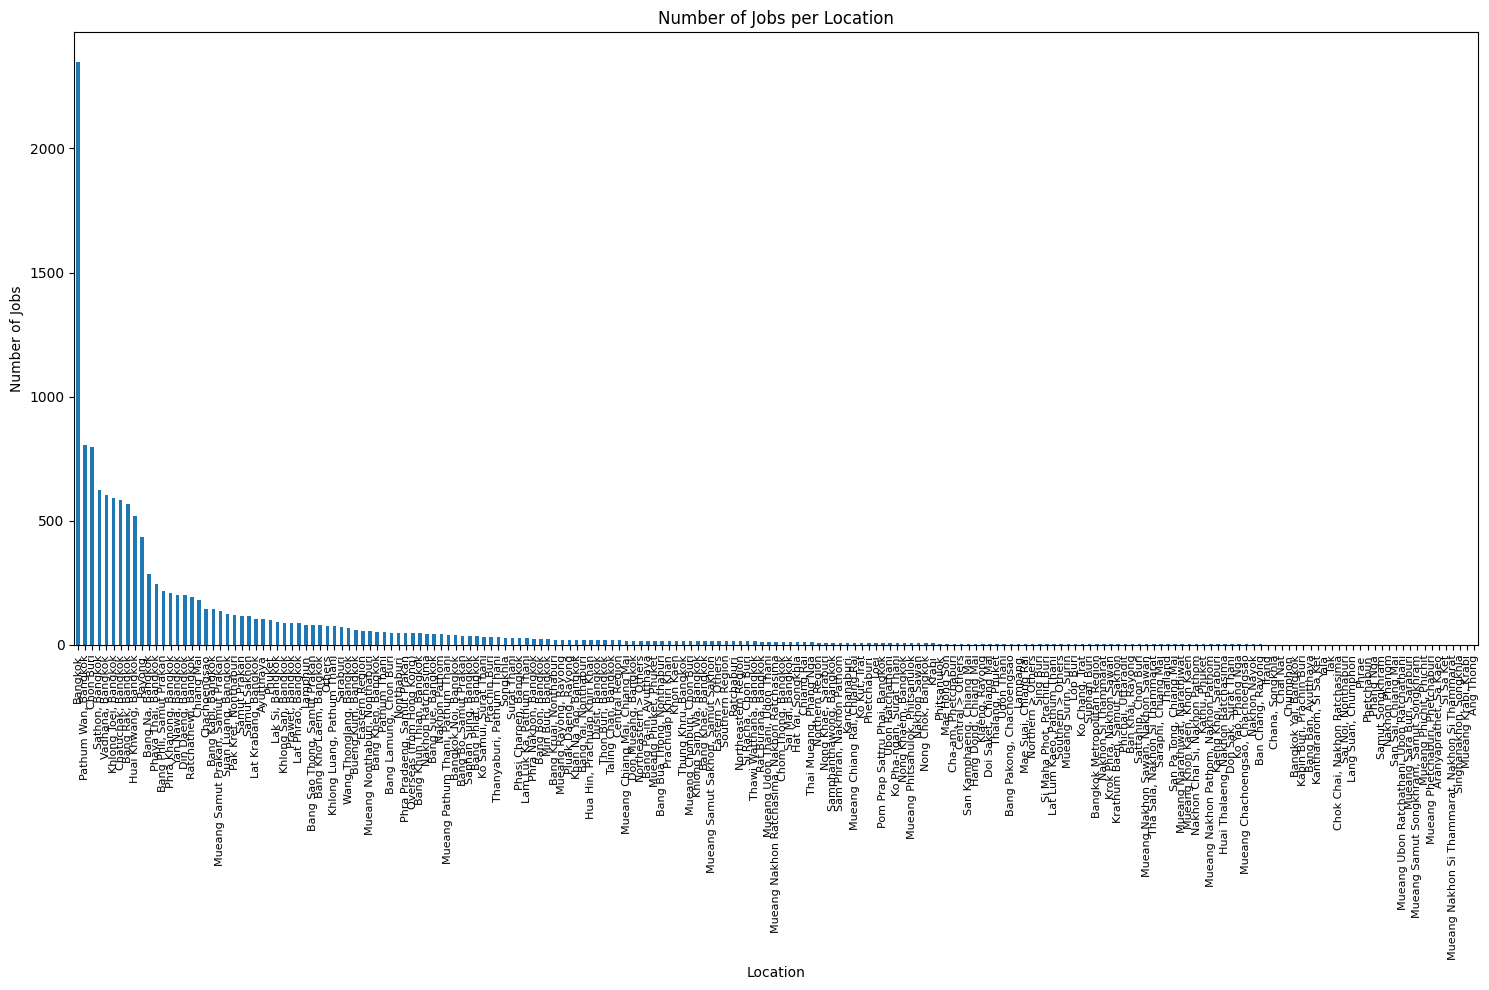

In [7]:
plt.figure(figsize=(15, 10)) 
job_counts.plot(kind='bar')
plt.title('Number of Jobs per Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90, fontsize=8) 
plt.tight_layout() 
plt.show()

In [8]:
df_tag = df.groupby(by=['Tag']).count().reset_index()
df_tag.sort_values(by='Job_Position', ascending=False, inplace=True)

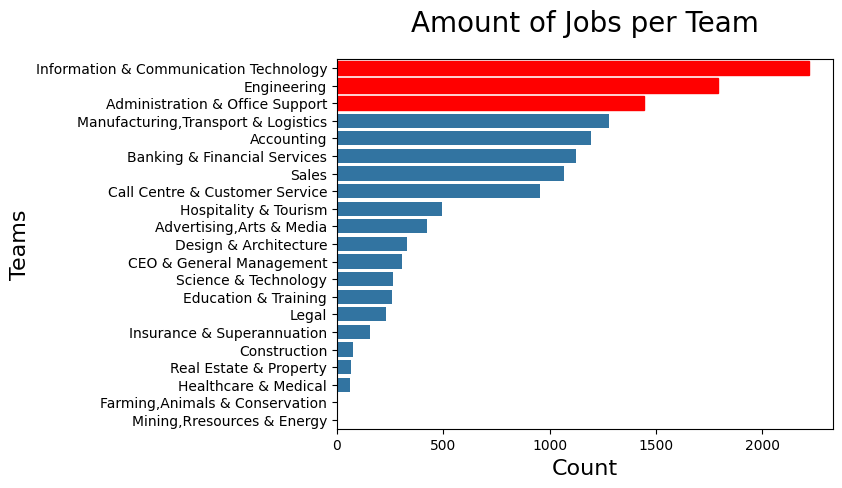

In [9]:
ax = sns.barplot(data=df_tag, x='Job_Position', y='Tag')

for bar in ax.patches:
    if bar.get_y() < 2:
        bar.set_color('red')  

#Labels
plt.xlabel('Count', fontsize=16)
plt.ylabel('Teams', fontsize=16)
plt.title('Amount of Jobs per Team', fontsize=20, pad=20);

In [10]:
df['Job_Description'] = df['Job_Description'].apply(lambda x : re.sub('\\\n',' ', x))
df['R_word_count'] = df['Job_Description'].apply(lambda x : len(x.split()))
df['R_char_count'] = df['Job_Description'].apply(lambda x : len(x.replace(' ','')))
df['R_punc_count'] = df['Job_Description'].apply(lambda x : len([a for a in x if a in string.punctuation]))
                                                           
df_stats_raw = df[['Job_Position','R_word_count','R_char_count','R_punc_count']]
df_stats_raw

,Job_Position,R_word_count,R_char_count,R_punc_count
0,Financial Accounting & Reporting,108,1490,27
1,Taxation,513,2969,99
2,Accounts Receivable/Credit Control,269,1579,12
3,Business Services & Corporate Advisory,262,1531,17
4,Taxation,264,1523,28
...,...,...,...,...
13737,Food Technology & Safety,89,1327,13
13738,Food Technology & Safety,227,1435,8
13739,"Mathematics, Statistics & Information Sciences",504,3039,88
13740,Food Technology & Safety,365,2319,88


In [11]:
df['Job_Description_Cleaned'] = df['Job_Description']

In [12]:
# ## Lower case
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(x.lower()for x in x.split()))
# ## remove tabulation and punctuation
# df['Job_description_cleaned'] = df['Job_description_cleaned'].str.replace('[^\w\s]',' ')
# ## digits
# df['Job_description_cleaned'] = df['Job_description_cleaned'].str.replace('\d+', '')

# #remove stop words
# stop = stopwords.words('english')
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# ## lemmatization
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# print("Preprocessed data: \n")
# df.head()

In [13]:
## Lower case
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Remove tabulation, punctuation and handle Thai characters
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('[^\w\sก-๙]', ' ', regex=True)

## Digits
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('\d+', '', regex=True)

## Remove stop words (English and Thai)
stop_words = set(stopwords.words('english')).union(set(thai_stopwords()))
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

## English Lemmatization
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## Tokenization for Thai Language (if needed)
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(word_tokenize(x, engine='newmm')))

print("Preprocessed data: \n")
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_3340\2863076896.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('[^\w\sก-๙]', ' ', regex=True)
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_3340\2863076896.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('\d+', '', regex=True)


Preprocessed data: 



,Job_Title,Company,Location,Job_Position,Job_Type,Salary Min,Salary Max,Job_Description,Tag,R_word_count,R_char_count,R_punc_count,Job_Description_Cleaned
0,GL Account Assistant Manager,"MEGA CLINIC Co., Ltd.","Sathon, Bangkok",Financial Accounting & Reporting,Full time,36000.0,53000.0,About us ร่วมเป็นส่วนหนึ่งกับทีม MEGA CLINIC M...,Accounting,108,1490,27,u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...
1,Tax Associate,PKF Holdings (Thailand) Limited,"Sathon, Bangkok",Taxation,Full time,NaN,NaN,Position Summary This position is for a lawyer...,Accounting,513,2969,99,position summary position lawyer assist client...
2,Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...,Sodexo Services (Thailand) Ltd.,Bangkok,Accounts Receivable/Credit Control,Full time,NaN,NaN,Reports To: FINANCE MANAGER Key Result Areas: ...,Accounting,269,1579,12,report finance manager key result area positio...
3,Assistant Accounting Manager,Mazars Holding (Thailand) Ltd.,"Sathon, Bangkok",Business Services & Corporate Advisory,Full time,NaN,NaN,Job Description Prepare management reports for...,Accounting,262,1531,17,job description prepare management report use ...
4,Assistant Tax Manager - M&A and tax advisory,Mazars Holding (Thailand) Ltd.,"Sathon, Bangkok",Taxation,Full time,NaN,NaN,Job Description: The ideal candidate will be a...,Accounting,264,1523,28,job description ideal candidate assigned work ...


In [14]:
## Define your custom stop words here
custom_stop_words = {'Job', 'description', 'qualification'}

## Remove stop words (English, Thai, and Custom)
stop_words = set(stopwords.words('english')).union(set(thai_stopwords())).union(custom_stop_words)
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


In [15]:
df['Job_Description'] = df['Job_Description_Cleaned'].apply(lambda x : re.sub('\\\n',' ', x))
df['C_word_count'] = df['Job_Description_Cleaned'].apply(lambda x : len(x.split()))
df['C_char_count'] = df['Job_Description_Cleaned'].apply(lambda x : len(x.replace(' ','')))
df['C_punc_count'] = df['Job_Description_Cleaned'].apply(lambda x : len([a for a in x if a in string.punctuation]))

df_stats_clean = df[['Job_Position','C_word_count','C_char_count','C_punc_count']]
df_stats_clean

,Job_Position,C_word_count,C_char_count,C_punc_count
0,Financial Accounting & Reporting,89,1391,0
1,Taxation,341,2264,0
2,Accounts Receivable/Credit Control,190,1306,0
3,Business Services & Corporate Advisory,171,1212,0
4,Taxation,176,1210,0
...,...,...,...,...
13737,Food Technology & Safety,82,1279,0
13738,Food Technology & Safety,157,1148,0
13739,"Mathematics, Statistics & Information Sciences",341,2432,0
13740,Food Technology & Safety,268,1885,0


In [16]:
df.head()

,Job_Title,Company,Location,Job_Position,Job_Type,Salary Min,Salary Max,Job_Description,Tag,R_word_count,R_char_count,R_punc_count,Job_Description_Cleaned,C_word_count,C_char_count,C_punc_count
0,GL Account Assistant Manager,"MEGA CLINIC Co., Ltd.","Sathon, Bangkok",Financial Accounting & Reporting,Full time,36000.0,53000.0,u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...,Accounting,108,1490,27,u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...,89,1391,0
1,Tax Associate,PKF Holdings (Thailand) Limited,"Sathon, Bangkok",Taxation,Full time,NaN,NaN,position summary position lawyer assist client...,Accounting,513,2969,99,position summary position lawyer assist client...,341,2264,0
2,Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...,Sodexo Services (Thailand) Ltd.,Bangkok,Accounts Receivable/Credit Control,Full time,NaN,NaN,report finance manager key result area positio...,Accounting,269,1579,12,report finance manager key result area positio...,190,1306,0
3,Assistant Accounting Manager,Mazars Holding (Thailand) Ltd.,"Sathon, Bangkok",Business Services & Corporate Advisory,Full time,NaN,NaN,job prepare management report use client manag...,Accounting,262,1531,17,job prepare management report use client manag...,171,1212,0
4,Assistant Tax Manager - M&A and tax advisory,Mazars Holding (Thailand) Ltd.,"Sathon, Bangkok",Taxation,Full time,NaN,NaN,job ideal candidate assigned work young dynami...,Accounting,264,1523,28,job ideal candidate assigned work young dynami...,176,1210,0


Text(0.5, 1.0, 'Word Count of Job Descriptions')

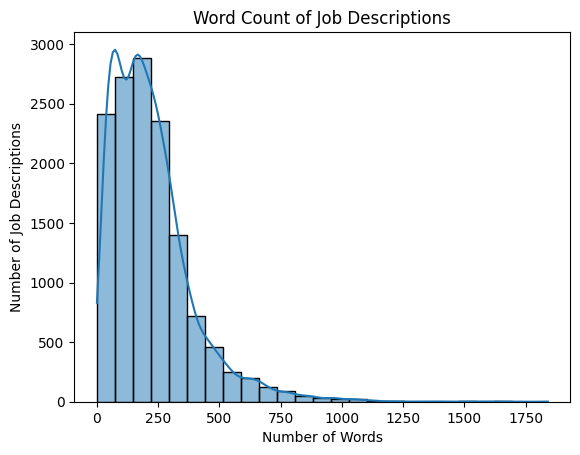

In [17]:
sns.histplot(data=df_stats_raw, x='R_word_count', bins=25, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Number of Job Descriptions')
plt.title('Word Count of Job Descriptions')

Text(0.5, 1.0, 'Charecters Count of Job Descriptions')

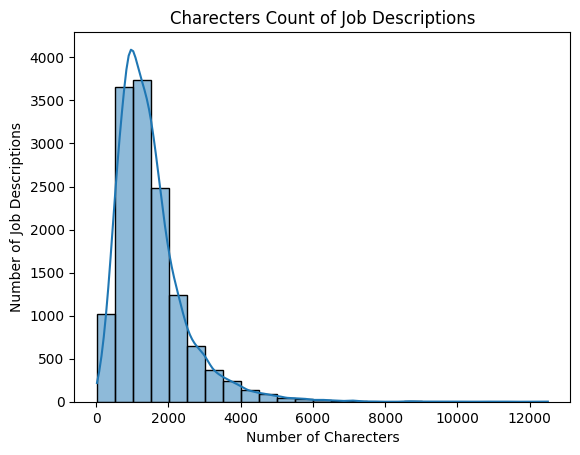

In [18]:
sns.histplot(data=df_stats_raw, x='R_char_count', bins=25, kde=True)
plt.xlabel('Number of Charecters')
plt.ylabel('Number of Job Descriptions')
plt.title('Charecters Count of Job Descriptions')

Text(0.5, 1.0, 'Word Count of Job Descriptions Cleaned')

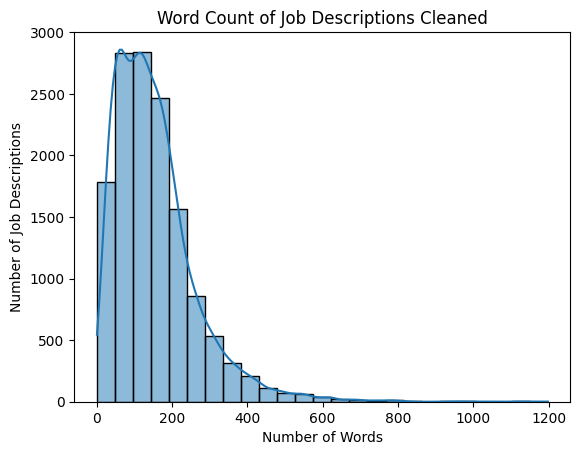

In [19]:
sns.histplot(data=df_stats_clean, x='C_word_count', bins=25, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Number of Job Descriptions')
plt.title('Word Count of Job Descriptions Cleaned')

Text(0.5, 1.0, 'Charecters Count of Job Descriptions Clean')

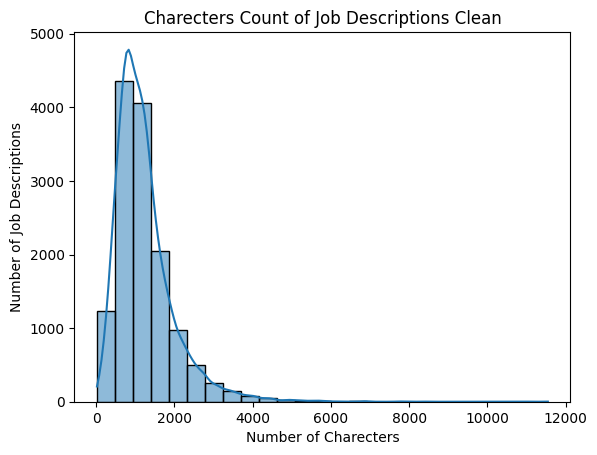

In [20]:
sns.histplot(data=df_stats_clean, x='C_char_count', bins=25, kde=True)
plt.xlabel('Number of Charecters')
plt.ylabel('Number of Job Descriptions')
plt.title('Charecters Count of Job Descriptions Clean')

In [21]:
text = df.Job_Description[1]

In [22]:
descriptions = ''.join(d for d in df['Job_Description_Cleaned']) #Looping over all cells in Job Description column and joining then together
print ('There are {} words in the combined data-related job descriptions.'.format(len(descriptions))) #Printing results

There are 19060193 words in the combined data-related job descriptions.


In [23]:
word_count = dict(Counter(descriptions.split()))
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'u': 4022, 'ร่วมเป็นส่วนหนึ่งกับทีม': 1, 'mega': 26, 'clinic': 132, 'เป็นคลินิกเวชกรรมประเภทเสริมความงามที่มีมาตรฐานและการบริการระดับสากล': 1, 'ในปัจจุบัน': 5, 'มีสาขาทั้งหมด': 1, 'สาขา': 549, 'สยามสแควร์': 3, 'เซ็นทรัลลาดพร้าว': 2}


In [24]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} 
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'experience': 20359, 'team': 16367, 'work': 15135, 'skill': 15112, 'business': 15031, 'management': 14148, 'customer': 13068, 'year': 11118, 'project': 10658, 'related': 10655}


In [25]:
words_all_jobs = pd.DataFrame.from_dict(words_popular, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs.head(3)

,index,Count
0,experience,20359
1,team,16367
2,work,15135


In [26]:
words_all_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95787 entries, 0 to 95786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   95787 non-null  object
 1   Count   95787 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


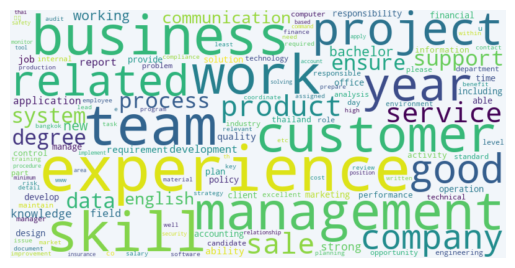

In [27]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular) #Generate wordcloud class from dictionary

plt.imshow(wordcloud.recolor(), interpolation='bilinear')
plt.axis('off')
plt.show();

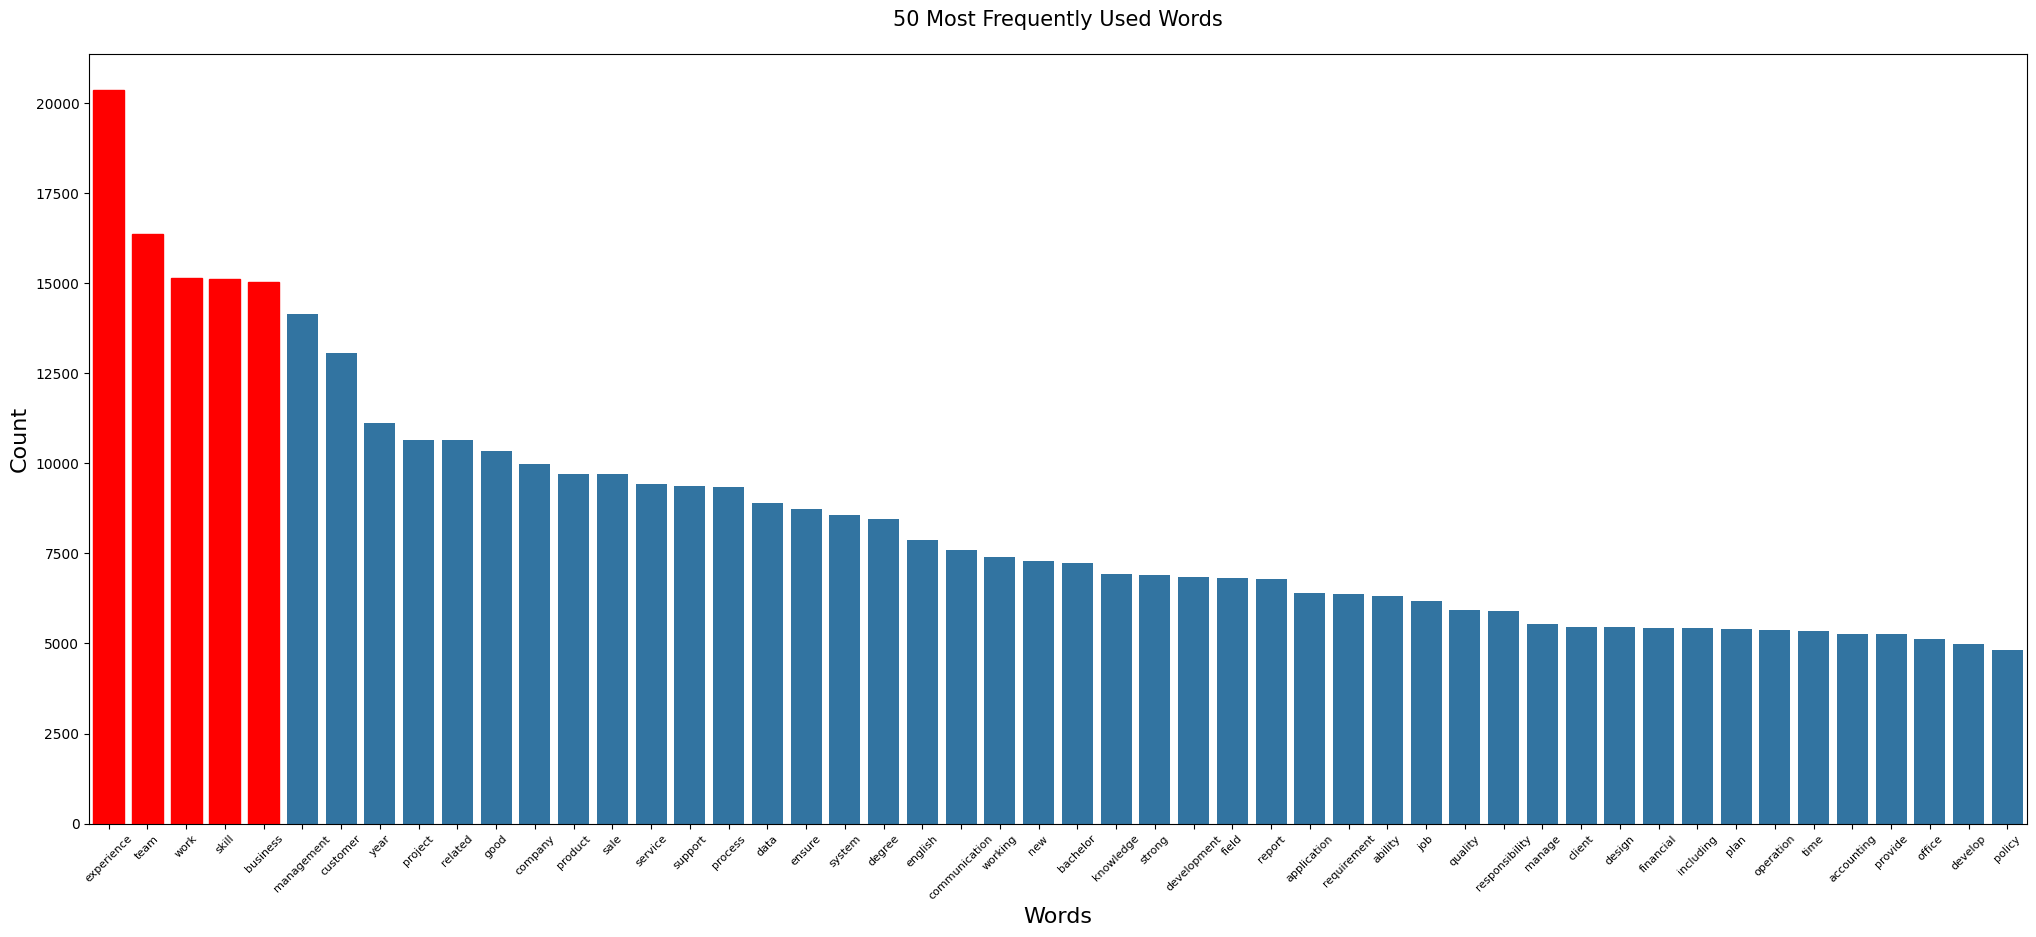

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Count')

for bar in ax.patches:
    if bar.get_x() < 4:
        bar.set_color('red')
plt.xticks(rotation=45, fontsize=8) 
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('50 Most Frequently Used Words', fontsize=15, pad=20);

In [29]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/df.shape[0]
words_all_jobs.head(3)

,index,Count,Ratio_Listings
0,experience,20359,1.481517
1,team,16367,1.191020
2,work,15135,1.101368


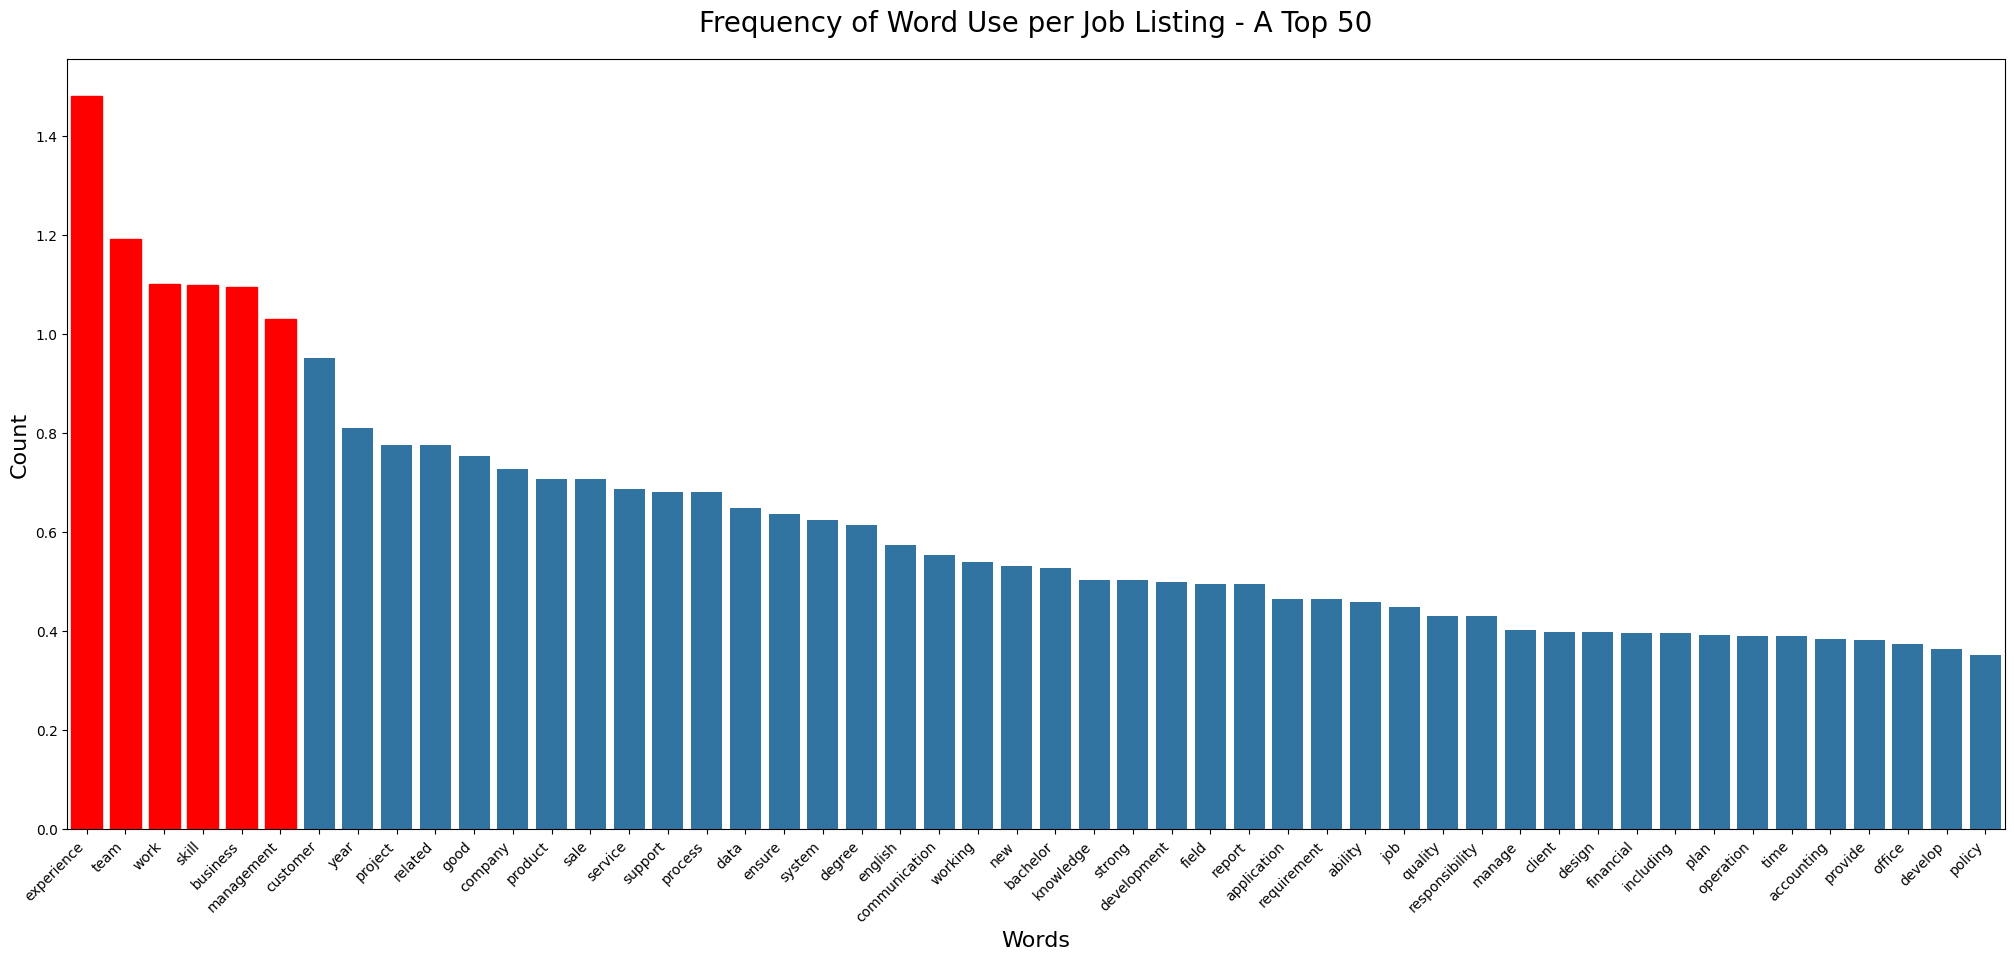

In [30]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Ratio_Listings')

for bar in ax.patches:
    if bar.get_x() < 5:
        bar.set_color('red')    

plt.xticks(rotation = 45, ha= 'right')
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Frequency of Word Use per Job Listing - A Top 50', fontsize=20, pad=20);

In [31]:
first_10_rows = words_all_jobs['index'].head(30).tolist()
my_list = []
for item in first_10_rows:
    my_list.append(item)
print(my_list)


['experience', 'team', 'work', 'skill', 'business', 'management', 'customer', 'year', 'project', 'related', 'good', 'company', 'product', 'sale', 'service', 'support', 'process', 'data', 'ensure', 'system', 'degree', 'english', 'communication', 'working', 'new', 'bachelor', 'knowledge', 'strong', 'development', 'field']
